Feature shape: (178, 13)
Class distribution:
 1    71
0    59
2    48
Name: count, dtype: int64

K-Means Silhouette Score: 0.2849
K-Means Adjusted Rand Index (ARI): 0.8975

K-Medoids Silhouette Score: 0.2676
K-Medoids Adjusted Rand Index (ARI): 0.7411


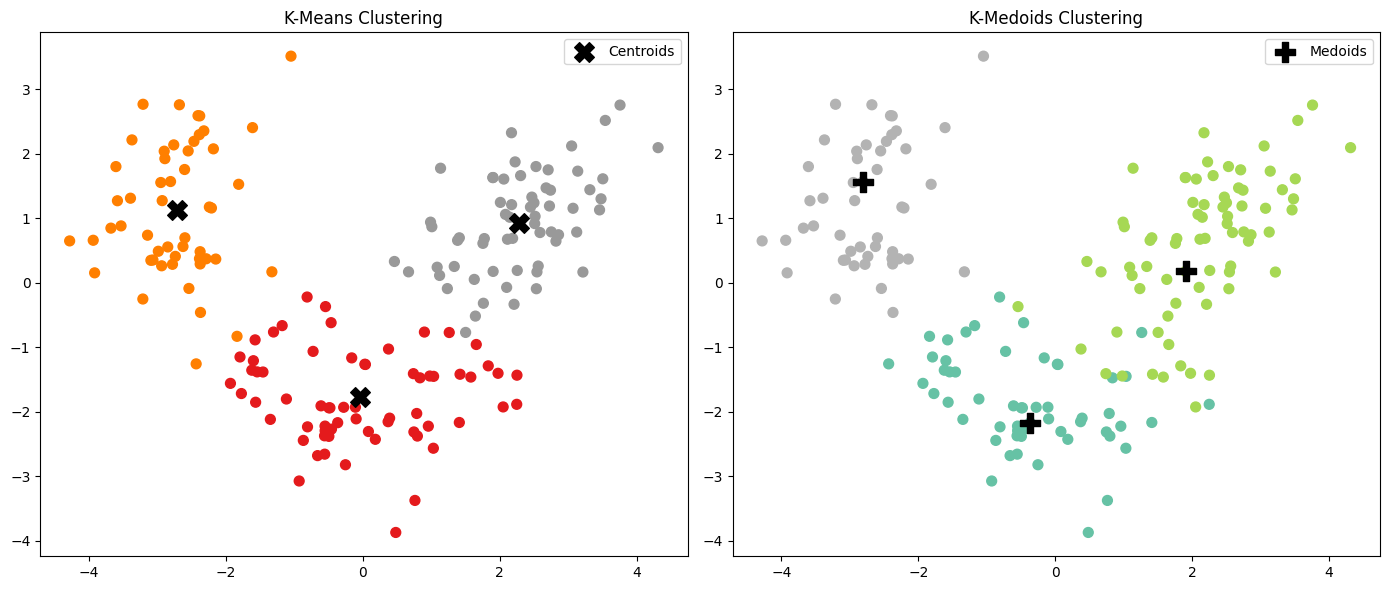


Summary of Clustering Performance:
   Algorithm  Silhouette Score  Adjusted Rand Index
0    K-Means          0.284859             0.897495
1  K-Medoids          0.267622             0.741137


In [3]:
# Lab 3: Clustering Analysis Using K-Means and K-Medoids
# Name: Prafulla Pradhan
# Course: MSCS-634-B01 – Big Data and Data Mining

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
import warnings
warnings.filterwarnings("ignore")

# Step 1: Load and Prepare Dataset
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target)

print("Feature shape:", X.shape)
print("Class distribution:\n", y.value_counts())

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
kmeans_ari = adjusted_rand_score(y, kmeans_labels)

print("\nK-Means Silhouette Score:", round(kmeans_silhouette, 4))
print("K-Means Adjusted Rand Index (ARI):", round(kmeans_ari, 4))

# Step 3: K-Medoids Clustering
kmedoids = KMedoids(n_clusters=3, random_state=42, method='pam', init='k-medoids++')
kmedoids_labels = kmedoids.fit_predict(X_scaled)
kmedoids_silhouette = silhouette_score(X_scaled, kmedoids_labels)
kmedoids_ari = adjusted_rand_score(y, kmedoids_labels)

print("\nK-Medoids Silhouette Score:", round(kmedoids_silhouette, 4))
print("K-Medoids Adjusted Rand Index (ARI):", round(kmedoids_ari, 4))

# Step 4: Visualization and Comparison
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# K-Means plot
axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='Set1', s=50)
axes[0].scatter(pca.transform(kmeans.cluster_centers_)[:, 0], 
                pca.transform(kmeans.cluster_centers_)[:, 1], 
                c='black', marker='X', s=200, label='Centroids')
axes[0].set_title('K-Means Clustering')
axes[0].legend()

# K-Medoids plot
axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=kmedoids_labels, cmap='Set2', s=50)
axes[1].scatter(pca.transform(X_scaled[kmedoids.medoid_indices_])[:, 0], 
                pca.transform(X_scaled[kmedoids.medoid_indices_])[:, 1], 
                c='black', marker='P', s=200, label='Medoids')
axes[1].set_title('K-Medoids Clustering')
axes[1].legend()

plt.tight_layout()
plt.show()

# Optional: Summary Table
summary = pd.DataFrame({
    'Algorithm': ['K-Means', 'K-Medoids'],
    'Silhouette Score': [kmeans_silhouette, kmedoids_silhouette],
    'Adjusted Rand Index': [kmeans_ari, kmedoids_ari]
})
print("\nSummary of Clustering Performance:")
print(summary)
